## Modelagem Preditiva

Este dataset possui ciclos de operação de uma máquina, onde o objetivo é criar um modelo para predizer possíveis falhas.

In [15]:
import pandas      as pd
import numpy       as np
import yellowbrick as yb

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [34]:
dataset = pd.read_csv('../datasets/anomaly/data.csv')
dataset.head(20)

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,False
1,2,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,False
2,3,2,1,79.027536,83.032190,82.642110,98.254386,98.785196,80.993479,False
3,4,2,3,79.716242,100.508634,122.362321,121.363429,118.652538,80.315567,False
4,5,2,5,39.989054,51.764833,42.514302,61.037910,50.716469,64.245166,False
5,6,1,2,58.336085,64.426353,56.479227,78.623742,65.911528,78.886214,False
6,7,1,3,77.937777,83.146657,77.800590,109.679048,86.230728,99.681179,False
7,8,1,4,78.563506,130.089912,110.479871,130.997020,85.218562,98.467375,False
8,9,3,7,77.486218,104.462955,77.390388,159.423483,115.211934,98.900268,False
9,10,1,8,42.619159,48.343336,65.789156,49.524829,64.915090,41.620715,False


## Visualização de features

In [6]:
# Utilizando Algumas funções para visualização das features
from yellowbrick.features import Rank2D, ParallelCoordinates

# Visualização da variável alvo - Survived
from yellowbrick.target import ClassBalance

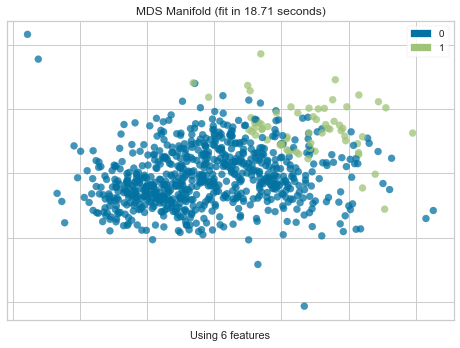

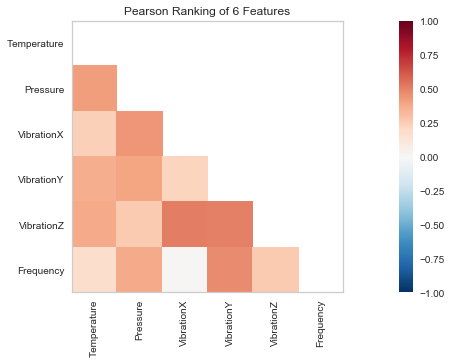

In [54]:
# Somente variáveis contínuas
X = dataset[dataset.columns[3:-1]]
y = dataset.Fail.replace([True, False], [1, 0])

# Visualização via Manifolds
from yellowbrick.features import manifold_embedding
viz = manifold_embedding(X, y)

# Visualização da matriz de correlação
plt.figure(figsize=(20,5))
viz = Rank2D(algorithm='pearson')
viz.fit(X,y)
viz.transform(X)
viz.show()

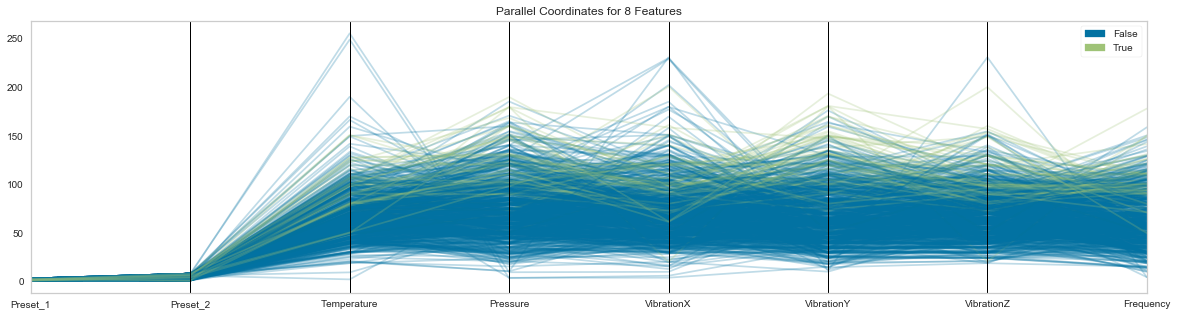

In [16]:
# Coordenadas paralelas de forma simples
X = dataset[dataset.columns[1:-1]]
y = dataset.Fail

plt.figure(figsize=(20,5))
viz = ParallelCoordinates()
viz.fit(X,y)
viz.show()

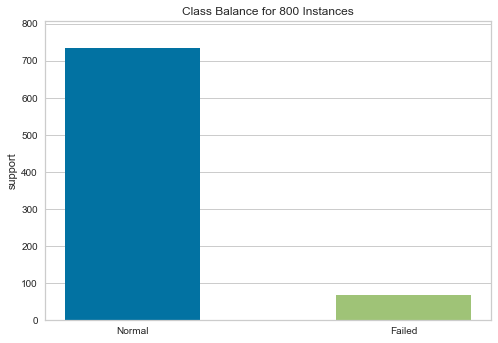

In [25]:
# Distibruição das classes
viz = ClassBalance(labels=['Normal', 'Failed'])
viz.fit(dataset.Fail)
viz.show();

## Tipos de falhas ?

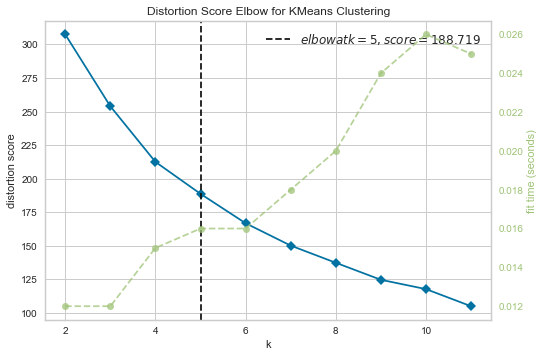

In [52]:
from sklearn.cluster       import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster   import KElbowVisualizer

# Separating the faiure examples
data_fail = dataset[dataset.Fail==True]

# Using a clustering method to group failed data
data_groups = data_fail[['Pressure', 'Temperature', 'Frequency', 'VibrationX', 'VibrationY', 'VibrationZ']]
data_groups = StandardScaler().fit_transform(data_groups)

# Fitting the model and plotting the scores
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(data_groups)        
visualizer.show();

In [56]:
# k = 5, data is better grouped in five groups
model = KMeans(n_clusters=5)
data_grouped = model.fit_predict(data_groups)
data_fail['KMeans_group'] = data_grouped
data_fail = data_fail.drop(['Fail'], axis=1)
data_fail[data_fail.columns[3:]].groupby(by='KMeans_group').agg(['mean', 'std', 'median', 'min', 'max'])

Temperature                                                \
                    mean        std      median        min         max   
KMeans_group                                                             
0              74.424202  18.572332   77.935154  48.091962  105.969444   
1             115.056159  18.043043  110.071418  88.748802  150.880308   
2              68.257369  14.804554   75.842178  48.171371   80.356903   
3              91.689430   9.979996   90.596548  79.538015  115.278603   
4              89.781346  19.539603   95.434777  49.985270  106.748409   

                Pressure                                                 ...  \
                    mean        std      median         min         max  ...   
KMeans_group                                                             ...   
0             116.743007  26.225923  110.694610   91.665516  179.818867  ...   
1             136.890970  20.710463  130.866581  101.037099  179.644437  ...   
2              77.840334  19.013135   73.303303   50.822002  101.454563  ...   
3              98.580808  13.077152   99.548317   75.277544  129.456071  ...   
4             154.948337  22.697138  154.342943  121.949264  189.995681  ...   

              VibrationZ                                                 \
                    mean        std      median         min         max   
KMeans_group                                                              
0              74.390415  21.308089   80.138971   20.522642   90.299923   
1             103.090761  17.640924   98.465296   80.537698  154.255877   
2             148.080211  33.265831  149.303192  100.000843  200.242674   
3             107.521458  22.435812  102.343334   72.841840  153.327082   
4             119.547182  18.632933  119.857720   99.020363  157.083613   

               Frequency                                                 
                    mean        std      median         min         max  
KMeans_group                                                             
0             129.279690  22.314260  125.835585  100.598048  178.090303  
1              94.561589   7.509851   90.947445   89.329631  120.222977  
2              64.426093  22.575391   50.436050   48.923777   96.448702  
3              95.705219  13.905976   99.642364   70.853353  113.784334  
4             109.316965  19.743987  109.876528   80.113540  141.502855  

[5 rows x 30 columns]

In [57]:
from sklearn.tree import DecisionTreeClassifier as DT
dt = DT(max_depth=5)

X = data_fail[data_fail.columns[3:-1]]
y = data_fail.KMeans_group

dt.fit(X,y);

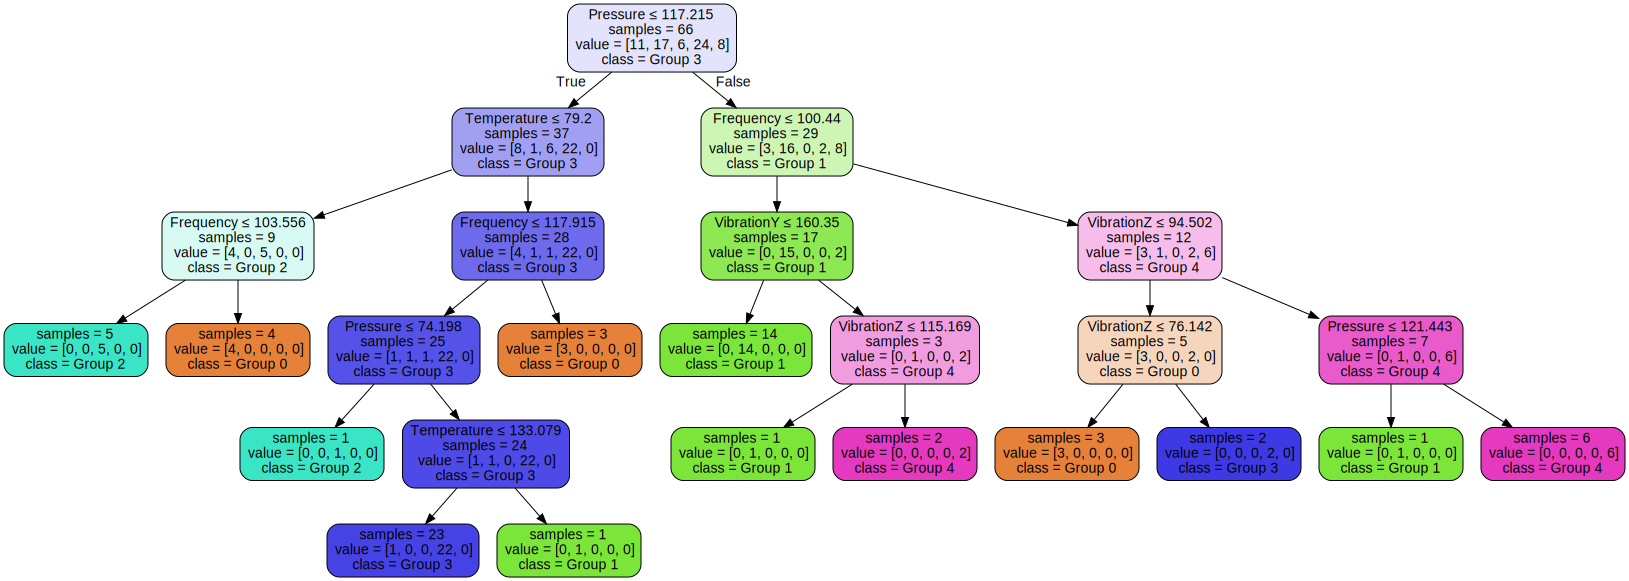

In [58]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=list(X.columns),  
                     class_names=['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4'],  
                     filled=True, rounded=True,  
                     special_characters=True,
                     impurity=False)  

graph = graphviz.Source(dot_data)  
graph

In [65]:
# Baseline Models - Decision Tree and Random Forest 
from sklearn.tree                  import DecisionTreeClassifier as DT
from sklearn.ensemble              import RandomForestClassifier
from sklearn.model_selection       import train_test_split, cross_val_score
from sklearn.metrics               import accuracy_score, matthews_corrcoef, f1_score,roc_auc_score, confusion_matrix, classification_report, recall_score, precision_score

dataset = dataset[['Frequency','Pressure', 'Temperature', 'VibrationX', 'VibrationY', 'VibrationZ', 'Fail']]
X = dataset.drop(['Fail'], axis=1)
X = StandardScaler().fit_transform(X)
y = dataset.Fail
y.replace([True, False], [1, 0]) # Maybe not necessary, since True = 1 and False = 0 in python

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'Number of fails for each set: \ntraining: {y_train.value_counts()[1]}\ntest    : {y_test.value_counts()[1]}')

Number of fails for each set: 
training: 51
test    : 15


In [66]:
dt = DT(max_depth=5, random_state=0)
dt.fit(X_train, y_train);

dt_pred = dt.predict(X_test)

print(f'Accuracy Score : {accuracy_score               (y_test, dt_pred)}')
print(f'f1 Score       : {f1_score                     (y_test, dt_pred)}')
print(f'recall Score   : {recall_score                 (y_test, dt_pred)}')
print(f'precision Score: {precision_score              (y_test, dt_pred)}\n')

Accuracy Score : 0.89375
f1 Score       : 0.3703703703703704
recall Score   : 0.3333333333333333
precision Score: 0.4166666666666667



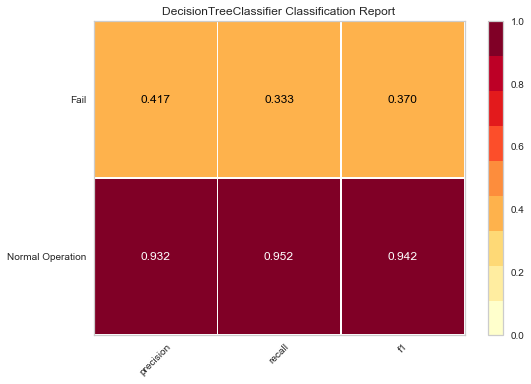

In [71]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(model=dt, classes=['Normal Operation', 'Fail'])
viz.fit(X_test, y_test)
viz.score(X_test, y_test)
viz.show(figsize=(20,5));